In [563]:
# Importing the libraries
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import ydata_profiling.profile_report 

In [564]:
'''
1. Import claims_data.csv and cust_data.csv which is provided to you and
combine the two datasets appropriately to create a 360-degree view of
the data. Use the same for the subsequent questions.
'''

'\n1. Import claims_data.csv and cust_data.csv which is provided to you and\ncombine the two datasets appropriately to create a 360-degree view of\nthe data. Use the same for the subsequent questions.\n'

In [565]:
# Importing the dataset
file_path = 'C://Projects_python//Project//Case Study//Downloads//Case Study 3 - Insurance Claims Case Study//'

In [566]:
file_name = 'claims.csv'
claim = pd.read_csv(file_path+file_name)

In [567]:
file_name = 'cust_demographics.csv'
cust_demographics = pd.read_csv(file_path+file_name)

In [568]:
claim.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [569]:
cust_demographics.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [570]:
claim.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [571]:
cust_demographics.dtypes

CUST_ID         int64
gender         object
DateOfBirth    object
State          object
Contact        object
Segment        object
dtype: object

In [572]:
merged_table = pd.merge(left= claim, right= cust_demographics, left_on= 'customer_id', right_on= 'CUST_ID', how= 'left')

In [573]:
merged_table.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476.0,Female,01-May-86,MA,413-187-7945,Silver
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No,19269962.0,Male,13-May-77,NV,956-871-8691,Gold


In [574]:
'''
2. Perform a data audit for the datatypes and find out if there are any
mismatch within the current datatypes of the columns and their
business significance.
'''

'\n2. Perform a data audit for the datatypes and find out if there are any\nmismatch within the current datatypes of the columns and their\nbusiness significance.\n'

In [575]:
merged_table.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
CUST_ID                float64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

In [576]:
merged_table.claim_id = merged_table.claim_id.astype('str')
merged_table.customer_id = merged_table.customer_id.astype('str')
merged_table.CUST_ID = merged_table.CUST_ID.astype('str')

In [577]:
merged_table.dtypes

claim_id                object
customer_id             object
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
CUST_ID                 object
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

In [578]:
merged_table.claim_date =pd.to_datetime(merged_table.claim_date)
merged_table.DateOfBirth =pd.to_datetime(merged_table.DateOfBirth)

In [579]:
merged_table.dtypes

claim_id                       object
customer_id                    object
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims           float64
fraudulent                     object
CUST_ID                        object
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
dtype: object

In [580]:
merged_table["claim_amount"]= merged_table['claim_amount'].astype(str)
merged_table['claim_amount'] = merged_table['claim_amount'].str.replace('$','')
merged_table['claim_amount']= np.where(merged_table.claim_amount== "nan","",merged_table.claim_amount )

C:\Users\pauld\AppData\Local\Temp\ipykernel_4524\1050068555.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_table['claim_amount'] = merged_table['claim_amount'].str.replace('$','')


In [581]:
merged_table["claim_amount"]= pd.to_numeric(merged_table['claim_amount'])

In [582]:
merged_table.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold


In [583]:
merged_table.dtypes

claim_id                       object
customer_id                    object
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
CUST_ID                        object
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
dtype: object

In [584]:
numeric_columns = merged_table.select_dtypes(include = 'number')
catagorial_cols = merged_table.select_dtypes(include = 'object')

In [585]:
def continuous_var_summary( x ):
    
    # freq and missings
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total
    
    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    return pd.Series( [ x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss,
                       x.sum(), x.mean(), x.std(), x.var(), lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max() ], 
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'nmiss', 'perc_miss',
                             'sum', 'mean', 'std', 'var', 'lc_iqr', 'uc_iqr', 'min', 'p1', 'p5', 
                             'p10', 'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max']) 

In [586]:
# In[296]:


def categorical_var_summary( x ):
    
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100 / x.count(), 2)], 
                     
                  index = ['n', 'nmiss', 'MODE', 'FREQ', 'PERCENT'])

In [587]:
numeric_audit=numeric_columns.apply( lambda x: continuous_var_summary(x))
numeric_audit

,claim_amount,total_policy_claims
dtype,float64,float64
cardinality,683,8
n_tot,1100,1100
n,1035,1090
nmiss,65,10
perc_miss,5.909091,0.909091
sum,12877599.5,1735.0
mean,12442.125121,1.591743
std,13766.391982,1.147251
var,189513548.202657,1.316185


In [588]:
numeric_audit=catagorial_cols.apply( lambda x: categorical_var_summary(x))
numeric_audit

,claim_id,customer_id,incident_cause,claim_area,police_report,claim_type,fraudulent,CUST_ID,gender,State,Contact,Segment
n,1100,1100,1100,1100,1100,1100,1100,1100,1085,1085,1085,1085
nmiss,0,0,0,0,0,0,0,0,15,15,15,15
MODE,54004764,85357756,Other causes,Auto,No,Material only,No,nan,Male,NY,743-569-4783,Gold
FREQ,1,2,290,985,630,663,846,15,556,31,2,375
PERCENT,0.09,0.18,26.36,89.55,57.27,60.27,76.91,1.36,51.24,2.86,0.18,34.56


In [589]:
'''
3. Convert the column claim_amount to numeric. Use the appropriate
modules/attributes to remove the $ sign.
'''
# already done in step 2

'\n3. Convert the column claim_amount to numeric. Use the appropriate\nmodules/attributes to remove the $ sign.\n'

In [590]:
'''
4. Of all the injury claims, some of them have gone unreported with the
police. Create an alert flag (1,0) for all such claims.
'''

'\n4. Of all the injury claims, some of them have gone unreported with the\npolice. Create an alert flag (1,0) for all such claims.\n'

In [591]:
merged_table.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold


In [592]:
merged_table.police_report.value_counts()

No         630
Unknown    300
Yes        170
Name: police_report, dtype: int64

In [593]:
merged_table.police_report == 'No'

0        True
1       False
2        True
3        True
4        True
        ...  
1095     True
1096     True
1097     True
1098    False
1099    False
Name: police_report, Length: 1100, dtype: bool

In [594]:
merged_table['police_report_alert'] = np.where(merged_table.police_report == 'No' , 1, 0)

In [595]:
merged_table.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,police_report_alert
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,1
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver,0
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,1
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,1
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold,1


In [596]:
'''
5. One customer can claim for insurance more than once and in each claim,
multiple categories of claims can be involved. However, customer ID
should remain unique.
Retain the most recent observation and delete any duplicated records in
the data based on the customer ID column.
'''

'\n5. One customer can claim for insurance more than once and in each claim,\nmultiple categories of claims can be involved. However, customer ID\nshould remain unique.\nRetain the most recent observation and delete any duplicated records in\nthe data based on the customer ID column.\n'

In [597]:
merged_table= merged_table.drop_duplicates(subset="customer_id", keep= "last")

In [598]:
merged_table.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,police_report_alert
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,1
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver,0
6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,18401412.0,Male,1999-03-02,AR,752-398-2914,Gold,1
7,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,73486606.0,Male,1999-10-25,AK,256-968-9172,Silver,1
8,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,32813689.0,Male,1993-10-12,ID,142-324-7481,Silver,0


In [599]:
# 6. Check for missing values and impute the missing values with an
# appropriate value. (mean for continuous and mode for categorical)

In [600]:
merged_table.isnull().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
CUST_ID                 0
gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
police_report_alert     0
dtype: int64

In [601]:
merged_table.dtypes

claim_id                       object
customer_id                    object
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
CUST_ID                        object
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
police_report_alert             int32
dtype: object

In [602]:
merged_table.select_dtypes('number')

,claim_amount,total_policy_claims,police_report_alert
0,2980.0,1.0,1
1,2980.0,3.0,0
6,1730.0,4.0,1
7,1160.0,3.0,1
8,2620.0,1.0,0
...,...,...,...
1095,3059.0,4.0,1
1096,1520.0,2.0,1
1097,23575.0,2.0,1
1098,25120.0,1.0,0


In [603]:
merged_table["claim_amount"]= merged_table['claim_amount'].replace(np.NaN,merged_table['claim_amount'].mean())
merged_table["total_policy_claims"]= merged_table['total_policy_claims'].replace(np.NaN,merged_table['total_policy_claims'].mean())

In [604]:
merged_table["claim_amount"].isna().sum()

0

In [605]:
merged_table["total_policy_claims"].isna().sum()

0

In [606]:
merged_table.gender = merged_table.gender.fillna(merged_table.gender.mode()[0])

In [607]:
merged_table.gender.isnull().sum()

0

In [608]:
merged_table.State = merged_table.State.fillna(merged_table.State.mode()[0])
merged_table.Contact = merged_table.Contact.fillna(merged_table.Contact.mode()[0])
merged_table.Segment = merged_table.Segment.fillna(merged_table.Segment.mode()[0])
merged_table.DateOfBirth = merged_table.DateOfBirth.fillna(merged_table.DateOfBirth.mode()[0])

In [609]:
merged_table.isnull().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
police_report_alert    0
dtype: int64

In [610]:
'''
7. Calculate the age of customers in years. Based on the age, categorize the
customers according to the below criteria
Children < 18
Youth 18-30
Adult 30-60
Senior > 60
'''

'\n7. Calculate the age of customers in years. Based on the age, categorize the\ncustomers according to the below criteria\nChildren < 18\nYouth 18-30\nAdult 30-60\nSenior > 60\n'

In [611]:
merged_table.DateOfBirth.head()

0   1979-01-12
1   2070-01-13
6   1999-03-02
7   1999-10-25
8   1993-10-12
Name: DateOfBirth, dtype: datetime64[ns]

In [612]:
now = dt.datetime.now().year

In [613]:
now

2023

In [614]:
dob_year = pd.to_datetime(merged_table['DateOfBirth']).dt.year          #extract year from DateOfBirth

In [615]:
dob_year

0       1979
1       2070
6       1999
7       1999
8       1993
        ... 
1095    1973
1096    1973
1097    1973
1098    1973
1099    1973
Name: DateOfBirth, Length: 1093, dtype: int64

In [616]:
x = dob_year-100                                               # for the years which belongs to 60's
v = now - x
y = now - dob_year
merged_table['age'] = (np.where(dob_year > now,v,y))

In [617]:
merged_table.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,police_report_alert,age
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,1,44
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver,0,53
6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,18401412.0,Male,1999-03-02,AR,752-398-2914,Gold,1,24
7,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,73486606.0,Male,1999-10-25,AK,256-968-9172,Silver,1,24
8,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,32813689.0,Male,1993-10-12,ID,142-324-7481,Silver,0,30


In [618]:
merged_table['age_group'] = pd.cut(merged_table['age'], bins=[0, 18, 30, 60, 100], labels=['Children', 'Youth', 'Adult', 'Senior'])


In [619]:
merged_table

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,police_report_alert,age,age_group
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,1,44,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver,0,53,Adult
6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,18401412.0,Male,1999-03-02,AR,752-398-2914,Gold,1,24,Youth
7,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,73486606.0,Male,1999-10-25,AK,256-968-9172,Silver,1,24,Youth
8,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,32813689.0,Male,1993-10-12,ID,142-324-7481,Silver,0,30,Youth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,nan,Male,1973-02-28,NY,123-346-2854,Gold,1,50,Adult
1096,10247193,14818669,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,nan,Male,1973-02-28,NY,123-346-2854,Gold,1,50,Adult
1097,79807493,85322831,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,nan,Male,1973-02-28,NY,123-346-2854,Gold,1,50,Adult
1098,69299345,73449366,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,nan,Male,1973-02-28,NY,123-346-2854,Gold,0,50,Adult


In [620]:
merged_table.age_group.value_counts()

Adult       810
Youth       208
Senior       75
Children      0
Name: age_group, dtype: int64

In [621]:
# 8. What is the average amount claimed by the customers from various segments?

In [622]:
merged_table.groupby(by = 'Segment').agg(average_amount = ('claim_amount', np.average))

,average_amount
Segment,
Gold,12761.649879
Platinum,12370.555376
Silver,12265.024420


In [623]:
# 9. What is the total claim amount based on incident cause for all the claims that have been done at
#  least 20 days prior to 1st of October, 2018.

In [624]:
Amount_incedent= round(merged_table.loc[merged_table.claim_date < "2018-09-10",:].groupby("incident_cause")["claim_amount"].sum().add_prefix("total_"),2)
Amount_incedent

incident_cause
total_Crime                  726958.33
total_Driver error          3344543.19
total_Natural causes        1315058.89
total_Other causes          3778019.05
total_Other driver error    3342799.96
Name: claim_amount, dtype: float64

In [625]:
# 10. How many adults from TX, DE and AK claimed insurance for driver
# related issues and causes?

In [626]:
merged_table.loc[merged_table.age_group == 'Adult',:].head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,police_report_alert,age,age_group
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,1,44,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver,0,53,Adult
9,63246959,33507197,Crime,2017-07-22,Auto,No,Material only,2748.5,2.0,Yes,33507197.0,Female,2066-09-09,RI,165-519-4583,Gold,1,57,Adult
10,74165873,99103685,Other driver error,2018-01-13,Home,No,Material only,1495.0,1.0,Yes,99103685.0,Female,1985-12-30,KY,764-439-9856,Gold,1,38,Adult
12,72738047,35875366,Other driver error,2018-04-24,Auto,Unknown,Material only,1870.0,1.0,No,35875366.0,Male,1990-09-16,MD,954-964-1746,Platinum,0,33,Adult


In [627]:
table = merged_table.loc[(merged_table.age_group == 'Adult') & (merged_table.State.isin(['TX', 'DE', 'AK'])) & (merged_table.incident_cause == 'Driver error'),:]

In [628]:
table.claim_id.count()

17

In [629]:
'''
11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. 
Represent the claim amount as a percentage on the pie chart.
'''

'\n11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. \nRepresent the claim amount as a percentage on the pie chart.\n'

In [630]:
gender_seg_amount = merged_table.groupby(['gender','Segment'])['claim_amount'].sum()

In [631]:
gender_seg_amount = pd.DataFrame(gender_seg_amount)

In [632]:
gender_seg_amount.index

MultiIndex([('Female',     'Gold'),
            ('Female', 'Platinum'),
            ('Female',   'Silver'),
            (  'Male',     'Gold'),
            (  'Male', 'Platinum'),
            (  'Male',   'Silver')],
           names=['gender', 'Segment'])

Text(0.5, 1.0, 'Claim Amount Distribution by Gender and Segment')

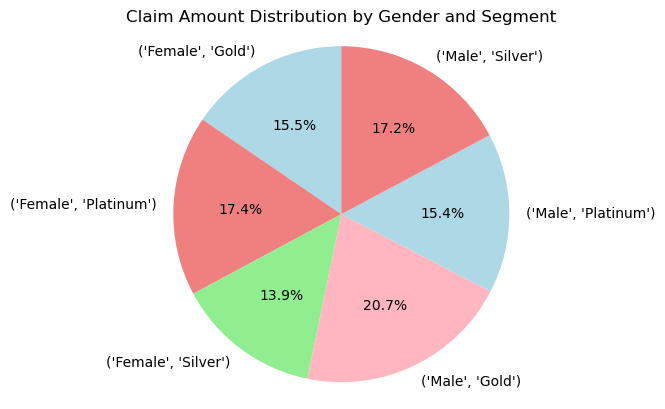

In [633]:
# Creating a pie chart
fig, ax = plt.subplots()
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightpink']  # You can customize the colors

# Plotting the pie chart
ax.pie(gender_seg_amount['claim_amount'], labels=gender_seg_amount.index,
       autopct='%1.1f%%', startangle=90, colors=colors)

# Setting aspect ratio to be equal ensures that the pie is drawn as a circle.
ax.axis('equal')  

# Adding a title
plt.title('Claim Amount Distribution by Gender and Segment')

In [634]:
'''
12. Among males and females, which gender had claimed the most for any
type of driver related issues? E.g. This metric can be compared using a
bar chart'''

'\n12. Among males and females, which gender had claimed the most for any\ntype of driver related issues? E.g. This metric can be compared using a\nbar chart'

In [635]:
merged_table.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,police_report_alert,age,age_group
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,1,44,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver,0,53,Adult
6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,18401412.0,Male,1999-03-02,AR,752-398-2914,Gold,1,24,Youth
7,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,73486606.0,Male,1999-10-25,AK,256-968-9172,Silver,1,24,Youth
8,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,32813689.0,Male,1993-10-12,ID,142-324-7481,Silver,0,30,Youth


In [636]:
driver_error = merged_table.loc[merged_table.incident_cause == 'Driver error']

In [637]:
driver_error_graph = driver_error.groupby('gender')['claim_amount'].count()

In [638]:
driver_error_graph = pd.DataFrame(driver_error_graph)

In [639]:
driver_error_graph

,claim_amount
gender,
Female,73
Male,187


<Axes: xlabel='gender', ylabel='claim_amount'>

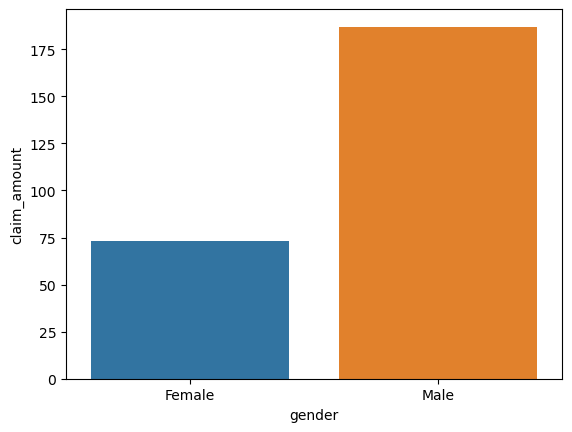

In [640]:
sns.barplot(x= driver_error_graph.index, y= driver_error_graph.claim_amount)

In [641]:
# males have maximun counts for the reported issues in the table

In [642]:
'''13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.'''

'13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.'

In [643]:
merged_table[['fraudulent','age_group']].loc[merged_table.fraudulent == 'Yes'].groupby('age_group')['fraudulent'].count()

age_group
Children      0
Youth        39
Adult       192
Senior       21
Name: fraudulent, dtype: int64

In [644]:
'''14. Visualize the monthly trend of the total amount that has been claimed by the customers.
Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.'''

'14. Visualize the monthly trend of the total amount that has been claimed by the customers.\nEnsure that on the “month” axis, the month is in a chronological order not alphabetical order.'

In [645]:
monthly_trend = merged_table[['claim_date', 'claim_amount']]

In [648]:
monthly_trend['month'] = monthly_trend.month.dt.month

C:\Users\pauld\AppData\Local\Temp\ipykernel_4524\1710095049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_trend['month'] = monthly_trend.month.dt.month


In [649]:
monthly_trend.head()

,claim_date,claim_amount,month
0,2017-11-27,2980.0,11
1,2018-10-03,2980.0,10
6,2018-01-13,1730.0,1
7,2018-04-10,1160.0,4
8,2018-02-15,2620.0,2


In [651]:
monthly_trend = pd.DataFrame(monthly_trend.groupby('month')['claim_amount'].sum())

In [652]:
monthly_trend

,claim_amount
month,
1,1.326985e+06
2,1.188012e+06
3,1.348468e+06
4,1.293901e+06
5,1.115280e+06
6,1.318741e+06
7,1.382768e+06
8,9.135063e+05
9,9.829357e+05


In [654]:
monthly_trend.index = ['January', 'February', 'March', 'Aril', 'May', 'June', 'July', 'August', 'September','October', ' November', 'December']

In [656]:
monthly_trend

,claim_amount
January,1.326985e+06
February,1.188012e+06
March,1.348468e+06
Aril,1.293901e+06
May,1.115280e+06
June,1.318741e+06
July,1.382768e+06
August,9.135063e+05
September,9.829357e+05
October,1.415649e+06


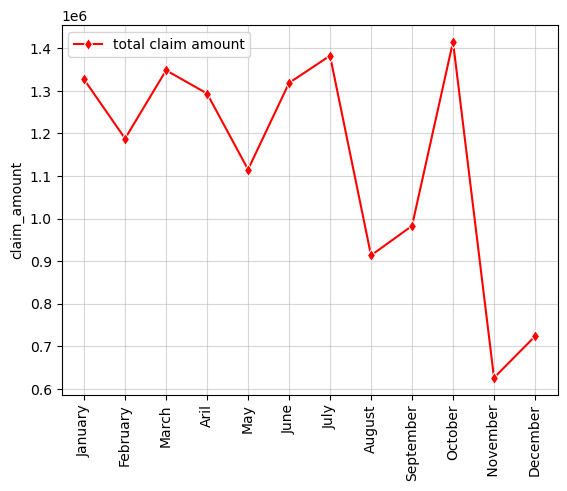

In [664]:
sns.lineplot(x= monthly_trend.index, y= monthly_trend.claim_amount, marker = 'd', c = 'r', label = 'total claim amount')
plt.xticks(rotation = 90)
plt.grid(alpha = 0.5)
plt.show()

In [665]:
'''15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar
chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.'''

'15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar\nchart, one facet that represents fraudulent claims and the other for non-fraudulent claims.'

In [672]:
Frauds_amount_gender= pd.DataFrame(merged_table.loc[(merged_table.fraudulent=="Yes"),:].groupby(["gender","age_group"])[["claim_amount"]].mean().add_prefix("Fraud_"))
Non_Frauds_amount_gender=pd.DataFrame(merged_table.loc[(merged_table.fraudulent=="No"),:].groupby(["gender","age_group"])[["claim_amount"]].mean().add_prefix("Non_Fraud_"))

In [673]:
Claims_age_gender=round(pd.merge(Frauds_amount_gender,Non_Frauds_amount_gender, on=["gender","age_group"]),2)

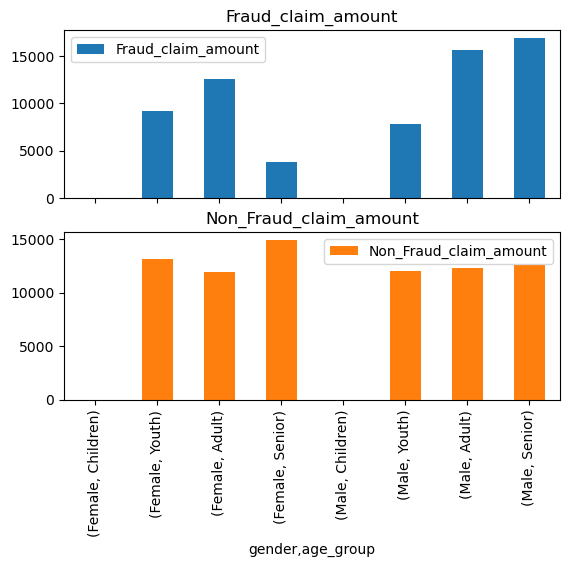

In [675]:
Claims_age_gender.plot(kind="bar", subplots= True, legend= True)
plt.show()

In [677]:
'''Based on the conclusions from exploratory analysis as well as suitable
statistical tests, answer the below questions. Please include a detailed
write-up on the parameters taken into consideration, the Hypothesis
testing steps, conclusion from the p-values and the business implications of
the statements.'''

'Based on the conclusions from exploratory analysis as well as suitable\nstatistical tests, answer the below questions. Please include a detailed\nwrite-up on the parameters taken into consideration, the Hypothesis\ntesting steps, conclusion from the p-values and the business implications of\nthe statements.'

In [678]:
# 16. Is there any similarity in the amount claimed by males and females?

In [679]:
claim_male = merged_table['claim_amount'].loc[merged_table['gender']=="Male"]
claim_female = merged_table['claim_amount'].loc[merged_table['gender']=="Female"]

In [681]:
print("The average amount claimed by males is {}".format(claim_male.mean()))
print("The average amount claimed by females is {}".format(claim_female.mean()))

The average amount claimed by males is 12825.373812404612
The average amount claimed by females is 12099.248985705743


In [682]:
# Two sample t-test:
# To conduct a valid test: (Assumptions for two sample t-test)

# Data values must be independent. Measurements for one observation do not affect measurements for any other observation.
# Data in each group must be obtained via a random sample from the population.
# Data in each group are normally distributed.
# Data values are continuous.
# The variances for the two independent groups are equal.

In [683]:
import scipy.stats as stats

In [686]:
#checking the variance

eq_var = stats.ttest_ind(a= claim_male,
                b= claim_female,
                equal_var=True)    # equal variance
eq_var.statistic

0.8982962111011336

In [687]:
uneq_var = stats.ttest_ind(a= claim_male,
                b= claim_female,
                equal_var=False)    # UnEqual variance
uneq_var.statistic

0.8992431685919812

In [688]:
# The t score of the variables is very similar thus we will consider it as equal variance

In [689]:
t= eq_var.statistic
p= eq_var.pvalue

print(" For the above test, the t-score is {} and the p-value is {}".format(t,p))

 For the above test, the t-score is 0.8982962111011336 and the p-value is 0.3692258511129498


In [690]:
if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')


# As the significance value of t test is greater than 0.05 we can safely conclude that there is a similarity in amount claimed by males and females.

We fail to reject null hypothesis


In [691]:
# 17. Is there any relationship between age category and segment?

In [694]:
# To find out this relationship we will use Chi Square test

# H0= No relation between category and segment;
# Ha= There is a relationship between category and segment


age_cat_seg = pd.crosstab(merged_table.age_group, merged_table.Segment, margins = True)
age_cat_seg

Segment,Gold,Platinum,Silver,All
age_group,,,,
Youth,71,69,68,208
Adult,287,266,257,810
Senior,28,26,21,75
All,386,361,346,1093


In [695]:
# performing test
Chi_test = stats.chi2_contingency(observed= age_cat_seg)
Chi_test

Chi2ContingencyResult(statistic=0.6313174395846602, pvalue=0.9999175930563284, dof=9, expected_freq=array([[  73.45654163,   68.6989936 ,   65.84446478,  208.        ],
       [ 286.05672461,  267.52973468,  256.41354071,  810.        ],
       [  26.48673376,   24.77127173,   23.74199451,   75.        ],
       [ 386.        ,  361.        ,  346.        , 1093.        ]]))

In [696]:
print("The chi square stat is {} and the p value is {}".format(Chi_test[0],Chi_test[1]))

The chi square stat is 0.6313174395846602 and the p value is 0.9999175930563284


In [697]:
# Since the significance value of the test is greter than 0.05, we fail reject the null hypothesis. 
# Therefore there is no relationship between age category and segment

In [698]:
# 18. The current year has shown a significant rise in claim amounts as
# compared to 2016-17 fiscal average which was $10,000.

In [699]:
# Null Hypothesis (H0): The average claim amount in the current year is not significantly different from the average claim 
# amount in the 2016-17 fiscal year.

# Alternative Hypothesis (H1): The average claim amount in the current year is significantly higher than the average claim 
# amount in the 2016-17 fiscal year.

In [700]:
merged_table.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,police_report_alert,age,age_group
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,1,44,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver,0,53,Adult
6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,18401412.0,Male,1999-03-02,AR,752-398-2914,Gold,1,24,Youth
7,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,73486606.0,Male,1999-10-25,AK,256-968-9172,Silver,1,24,Youth
8,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,32813689.0,Male,1993-10-12,ID,142-324-7481,Silver,0,30,Youth


In [713]:
merged_table.dtypes

claim_id                       object
customer_id                    object
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
CUST_ID                        object
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
police_report_alert             int32
age                             int64
age_group                    category
year                            int64
dtype: object

In [721]:
pre_date = dt.datetime(2016,4,1)
last_date = dt.datetime(2017,3,31)

In [722]:
print(pre_date)
print(last_date)

2016-04-01 00:00:00
2017-03-31 00:00:00


In [725]:
table1 = merged_table.loc[(merged_table['claim_date']>pre_date) & (merged_table['claim_date']<last_date)]

In [727]:
table1.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,police_report_alert,age,age_group,year
20,32630720,75584003,Crime,2017-02-03,Auto,No,Material only,12475.266051,1.0,No,75584003.0,Female,2067-04-22,OK,723-418-3248,Silver,1,56,Adult,2017
38,30942972,60225946,Other causes,2017-02-17,Auto,No,Material only,1890.000000,1.0,No,60225946.0,Female,1977-08-27,OH,715-356-4572,Gold,1,46,Adult,2017
46,14836805,75252854,Other driver error,2017-02-23,Auto,Yes,Injury only,32630.000000,1.0,No,75252854.0,Male,1995-08-30,NH,542-927-5413,Gold,0,28,Youth,2017
63,21972507,83088652,Driver error,2017-01-14,Auto,Unknown,Material only,2910.000000,1.0,No,83088652.0,Male,1998-10-05,MD,968-236-9367,Platinum,0,25,Youth,2017
67,79089153,78364565,Other causes,2017-02-10,Auto,Yes,Injury only,25830.000000,3.0,No,78364565.0,Female,2061-08-07,NM,862-483-5218,Silver,0,62,Senior,2017


In [728]:
t_statistic, p_value= stats.ttest_1samp(table1.claim_amount, popmean= 10000)

In [729]:
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 1.324058887866776
P-value: 0.18733722232103042


In [730]:
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant rise in claim amounts.")
else:
    print("Fail to reject the null hypothesis: There is no significant rise in claim amounts.")

Fail to reject the null hypothesis: There is no significant rise in claim amounts.


In [731]:
# 19. Is there any difference between age groups and insurance claims?

In [732]:
# ANOVA test

# H0 : mean(AgeGroup[Youth]) == mean(AgeGroup[Adult]) (No difference between age groups and insurance claims 
# or No influence of age groups on insurance claims) 

# Ha : mean(AgeGroup[Youth]) <> mean(AgeGroup[Adult]) (There is some difference between age groups and insurance 
# claims or there is some influence of age groups on insurance claims)

In [735]:
age_group_1 = merged_table['total_policy_claims'].loc[merged_table.age_group=="Youth"]
age_group_2 = merged_table['total_policy_claims'].loc[merged_table.age_group=="Adult"]
# Perfrom the Anova
anova = stats.f_oneway(age_group_1,age_group_2)
# Statistic :  F Value
f = anova.statistic
p = anova.pvalue
print("The f-value is {} and the p value is {}".format(f,p))
if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

The f-value is 0.7855597644220839 and the p value is 0.3756558760938056
We fail to reject null hypothesis


In [736]:
# 20. Is there any relationship between total number of policy claims and the claimed amount?

In [738]:
#Correlation
merged_table.total_policy_claims.corr(other= merged_table.claim_amount)


# As the correlation is negative the number of policy claims in inversely propotional to the claimed amount.

-0.023900066023189667

In [739]:
'''..................................END...................................................'''

'..................................END...................................................'